## Tarea 12                   

El método implicito es:
$$x_{n+1}=x_n+f(x_{n+1},t_{n+1})h,$$
Observen que en cada paso hay que resolver una ecuación algebraica, por ej, para el primer paso $x_1=x_0+f(x_1,t_1)h$
tenemos que despejar $x_1$. Una forma es utilizar el método de Newton que ya desarrollaron, es decir, si tomamos $g(x)=x-f(x,t_1)h$, el método nos dice que:
$$\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}.$$
Para asegurar que $\tilde x_k$ converge a $x_1$ (puesto que en general $g(x)$ tiene muchas raices), tenemos que tomar $\tilde x_0$ lo mas cerca posible de $x_1$, lo más prudente es tomar $\tilde x_0=x_0$. Por lo tanto, para cualquier paso tenemos que si conocemos $x_n$, entonces $x_{n+1}$ esta dado por el límite 

$$x_{n+1}=\lim_{k\to \infty}\tilde x_k,$$
donde $\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}$, con $g(x)=x_n-f(x,t_n)$.

Otra forma de encontrar $x_{n+1}$ sin tener necesidad de calcular la derivada explicitamente, es modificar el método de Newton usando una derivada númerica. Otra forma es utilizar el método de punto fijo.

En la teoría de sistemas dinámicos discretos, donde estos se definen como:
$$x_{n+1}=F(x_n),$$
Obsérvese que el método de Newton y el método de Euler tienen esta forma.

Cuándo $x_n$ converge a alguna parte en el límite de $n\to\infty$, se dice que existe un _punto fijo estable_ y que la condición inicial del nuestro sistema dinámico esta en la _cuenca de atracción_ de dicho _punto fijo estable_ (también conocido como atractor, y sí, existen los repulsores). 
Los puntos fijos, $x^*$, cumplen:
$$x^*=f(x^*),$$
por eso se les dice _fijos_, si el sistema comienza en uno de ellos, la suceción es constante.
Entonces, para resolver la ecuación algebraica presente en el método de Euler, podemos hacer las siguientes identificaciones:

$$x_{n+1}\to x^*\text{ ,y}$$
$$x_n+f(x,t_{n+1})h\to F(x).$$
Es decir, $x_{n+1}$ (con $x_n$ obviamente conocido) es un punto fijo del sistema dinámico:
$$ x_{n+1}^{[k+1]}=x_n+f(x_{n+1}^{[k]},t_{n+1})h,$$
nuevamente es prudente utilizar $x_{n+1}^{[0]}=x_n$.

__Ejercicio 1:__ Implementar método implicito de Euler como quieran.

In [1]:
#Para el método de Euler implicito necesitaremos el metodo de Newton así que lo vamos a definir 

using SymPy
A,x,a,n,m=symbols("A,x,a,n,m") # Definimos las variables simbolicas que se ocupan


function Newton_ultimate(f::Function,x0::Float64)
    df = simplify(diff(f),[x])
    d = lambdify(df,[x])
    eps=200
    
    for i in 1:eps
    
        x0= x0-(f(x0)/d(x0))
   
    end
  
    return x0
  
end





Newton_ultimate (generic function with 1 method)

g (generic function with 1 method)

In [29]:
function metodo_euler_implicit(f::Function,t0::Float64,tf::Float64,x0::Float64,h::Float64) # ahora hacemos la funcion de Euler implicito
    x = x0 # igualamos x a x0
    lista_x = [] # Definimos un arreglo donde se iran guardando los datos
    push!(lista_x,x) #llenamos nuestro arreglo con las x
    lista_t = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea  intervalos
    
    for i in 2:length(lista_t)  # con este ciclo for se implementara nuestra formula
        t = i*h
        g(x)= x - lista_x[i-1] - h*f(x,lista_t[i])
        x2 = Newton_ultimate(g,lista_t[length(lista_t)])
        push!(lista_x,x2)
    end
  
    
    
    return lista_x,lista_t
end

metodo_euler_implicit (generic function with 1 method)

In [30]:
function f(x,t)
    -(2.5)*x
end

f (generic function with 1 method)

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.


In [63]:
using PyPlot
#Aqui practicamente es lo mismo que Euler, entonces comenzamos definiendo una funcion 
function euler_puntoM(f::Function,x0,t0,tf,h)
    x = x0 # igualamos x a x0
    lista_x = [] # Definimos un arreglo donde se iran guardando los datos
    push!(lista_x,x) #llenamos nuestro arreglo con las x
    lista_t = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    
    for i in 2:length(lista_t)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(x,t)*h/2
        push!(lista_x,x)
    end
    
  #plot(lista_x,lista_t)  
    return lista_x,lista_t
end

euler_puntoM (generic function with 1 method)

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

In [7]:
function k1(t,w) # Definimos una funcion para obtener K1
    
    return f(t,w)
    
end


k1 (generic function with 1 method)

In [8]:
function k2(t,w)
    return f(t+h/2,w+(h/2)*f(t,w))
end


k2 (generic function with 1 method)

In [9]:
function k3(t,w)
    return f(t+h/2,w+(h/2)*f(t+h/2,w+(h/2)*f(t,w)))
end

k3 (generic function with 1 method)

In [10]:
function k4(t,w)
    return f(t+h,w+h*f(t+h/2,w+(h/2)*f(t+h/2,w+(h/2)*f(t,w))))
end

k4 (generic function with 1 method)

In [11]:
function f(t,w)
    return w-(1/2)*exp(t/2)*sin(5t) + 5exp(t/2)*cos(5t) #Utilizamos esta ecuación para probar nuestro método
end

f (generic function with 1 method)

In [12]:
function RungaKutta(f::Function,t0,N,h) 
t = zeros(1,N)
W = zeros(1,N)
w = zeros(1,N)
t[1] = t0
W[1] = 0
    for k in 1:N-1
        t[k+1] = t[k] + h
        W[k+1]=W[k]+(h/6)*(f(t[k],w[k])+2(f(t[k]+h/2,w[k]+(h/2)*f(t[k],w[k])))+(f(t[k]+h/2,w[k]+(h/2)*f(t[k]+h/2,w[k]+(h/2)*f(t[k],w[k]))))+(f(t[k]+h,w[k]+h*f(t[k]+h/2,w[k]+(h/2)*f(t[k]+h/2,w[k]+(h/2)*f(t[k],w[k]))))))
        println(t[k], " ", W[k])
    end
    (t,W)
end

RungaKutta (generic function with 1 method)

In [15]:
(t,W)=RungaKutta(f,0,100,0.05) 


0.0 0.0
0.05 0.21127230190371052
0.1 0.40894581113246775
0.15000000000000002 0.5795951086811243
0.2 0.7108465281366969
0.25 0.792228820362905
0.3 0.8159449360786987
0.35 0.7775111868912294
0.39999999999999997 0.6762158295628594
0.44999999999999996 0.515358286910059
0.49999999999999994 0.3022423549040739
0.5499999999999999 0.04791121997087855
0.6 -0.23337188895205851
0.65 -0.524877014381606
0.7000000000000001 -0.8083582400980707
0.7500000000000001 -1.0651508205228273
0.8000000000000002 -1.2773515295375133
0.8500000000000002 -1.429010492855816
0.9000000000000002 -1.5072583506554467
0.9500000000000003 -1.5032928567985742
1.0000000000000002 -1.4131541806929893
1.0500000000000003 -1.2382281566726847
1.1000000000000003 -0.9854311282495971
1.1500000000000004 -0.6670481601381457
1.2000000000000004 -0.30021726336330595
1.2500000000000004 0.09392530510831404
1.3000000000000005 0.4914010111525496
1.3500000000000005 0.8667872942379353
1.4000000000000006 1.1947804888614577
1.4500000000000006 1.4518

([0.0 0.05 … 4.9 4.95], [0.0 0.211272 … -4.33415 -2.02989])

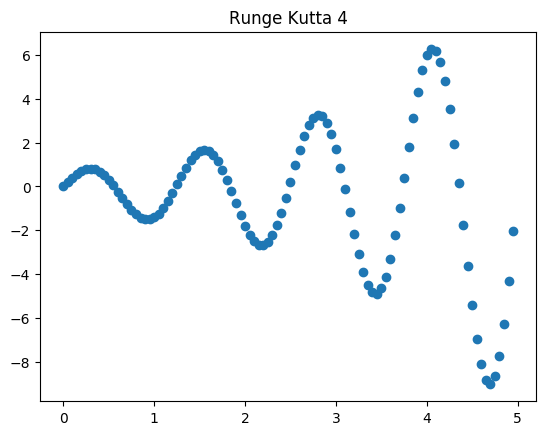

PyObject <matplotlib.collections.PathCollection object at 0x7f42b0bb3990>

In [18]:
using PyPlot
title("Runge Kutta 4")
scatter(t,W,)

__Ejercicio 5:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

In [19]:
# copiamos la tarea 11 para comenzar a comparar con el metodo implicito
function metodo_euler(f::Function,x0::Int64,t0,tf,h) #comenzamos haciendo la función
    x = x0 # igualamos x a x0
    lista_x = [] # Definimos un arreglo donde se iran guardando los datos
    push!(lista_x,x) #llenamos nuestro arreglo con las x
    lista_t = linspace(t0,tf,(tf-t0)/h+1) # con esto se crea un intervalo
    
    for i in 2:length(lista_t)  # con este ciclo for se implementara nuestra formula
        t = i*h
        x = x+f(x,t)*h
        push!(lista_x,x)
    end
    
    
    return lista_x,lista_t
end

metodo_euler (generic function with 1 method)

In [20]:
metodo_euler((x,t)->-(2.5)*x,1,0,8,1) # Veamos si nuestra función funciona

(Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859, 25.6289], 0.0:1.0:8.0)

In [21]:
# tenemos que la solucion de nuestra ecuación  diferencial es la siguiente

function q(x,t)
    exp.(-5t/2)
end

q (generic function with 1 method)

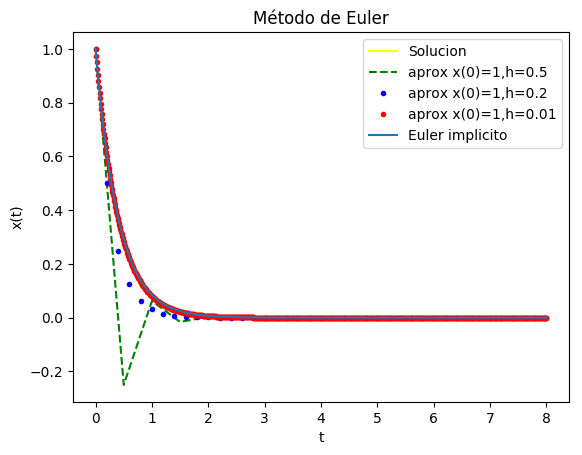

PyObject <matplotlib.legend.Legend object at 0x7f42b0dfd110>

In [35]:


#Llego la hora de graficar 
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.5)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.5)[1],label= "aprox x(0)=1,h=0.5","--",color="green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.2)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.2)[1],label= "aprox x(0)=1,h=0.2",".",color="blue")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,1,0,8,0.01)[2],metodo_euler((x,t)->-(2.5)*x,1,0,8,0.01)[1],label= "aprox x(0)=1,h=0.01",".",color="red")
legend()

plot(metodo_euler_implicit((x,t)->-(2.5)*x,0.0,8.0,1.0,0.01)[2],metodo_euler_implicit((x,t)->-(2.5)*x,0.0,8.0,1.0,0.01)[1],label="Euler implicito")
legend()

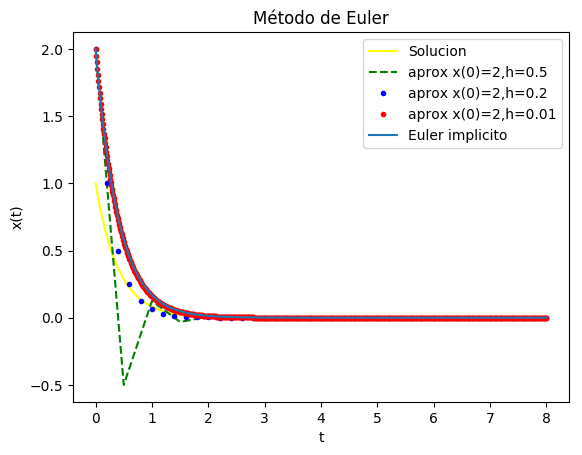

PyObject <matplotlib.legend.Legend object at 0x7f42b062ef50>

In [36]:
xlabel("t")
ylabel("x(t)")
title("Método de Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.5)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.5)[1],label= "aprox x(0)=2,h=0.5","--",color="green")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.2)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.2)[1],label= "aprox x(0)=2,h=0.2",".",color="blue")
legend()
plot(metodo_euler((x,t)->-(2.5)*x,2,0,8,0.01)[2],metodo_euler((x,t)->-(2.5)*x,2,0,8,0.01)[1],label= "aprox x(0)=2,h=0.01",".",color="red")
legend()
plot(metodo_euler_implicit((x,t)->-(2.5)*x,0.0,8.0,2.0,0.01)[2],metodo_euler_implicit((x,t)->-(2.5)*x,0.0,8.0,2.0,0.01)[1],label="Euler implicito")
legend()

__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

In [54]:
function g(t,w)    
    (2w-18t)/(1+t)
end

g (generic function with 1 method)

In [44]:
(t,W)=RungaKutta(g,0,100,0.05) 

0.0 0.0
0.05 -0.018662360839636273
0.1 -0.07300061317680695
0.15000000000000002 -0.15969802204812886
0.2 -0.2758796013580665
0.25 -0.41903703576039886
0.3 -0.5869688962874151
0.35 -0.7777325588737904
0.39999999999999997 -0.9896051812009582
0.44999999999999996 -1.2210517649925605
0.49999999999999994 -1.4706988144928033
0.5499999999999999 -1.7373124545999545
0.6 -2.0197801325313423
0.65 -2.3170952212887386
0.7000000000000001 -2.628343989817394
0.7500000000000001 -2.952694516417448
0.8000000000000002 -3.289387207776872
0.8500000000000002 -3.6377266524946243
0.9000000000000002 -3.99707458990572
0.9500000000000003 -4.366843815895042
1.0000000000000002 -4.746492879777802
1.0500000000000003 -5.1355214521622905
1.1000000000000003 -5.533466264449515
1.1500000000000004 -5.93989753736908
1.2000000000000004 -6.354415829546167
1.2500000000000004 -6.776649248191655
1.3000000000000005 -7.206250973111105
1.3500000000000005 -7.64289705273253
1.4000000000000006 -8.086284437066826
1.4500000000000006 -8.5

([0.0 0.05 … 4.9 4.95], [0.0 -0.0186624 … -47.5853 -48.214])

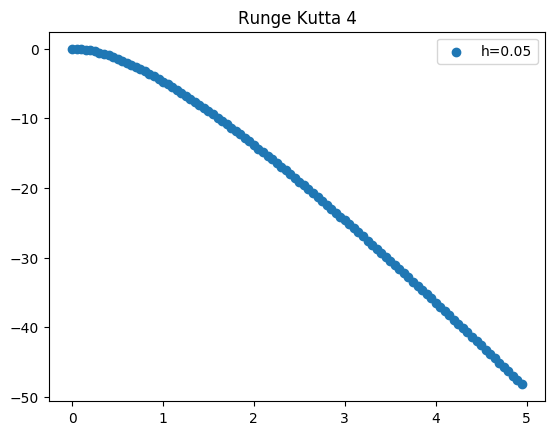

PyObject <matplotlib.legend.Legend object at 0x7f42afcfff50>

In [51]:
using PyPlot
title("Runge Kutta 4")
scatter(t,W,label="solucion", label="h=0.05" )
legend()
plot()

In [56]:
function h(t,x)    
    (2x-18t)/(1+t)
end

h (generic function with 1 method)

In [67]:
function s(t) #Esta es la solucion exacta de la ecuacion
    4+8t-5t^2
end

s (generic function with 1 method)

In [65]:
euler_puntoM(h,4,0,10,0.05)

(Any[4, 3.641, 3.28958, 2.94681, 2.614, 2.29266, 1.98465, 1.69212, 1.41763, 1.1641  …  1.04725, 1.05274, 1.05823, 1.06372, 1.06921, 1.0747, 1.08018, 1.08567, 1.09116, 1.09665], 0.0:0.05:10.0)